# Python-igraph编程实践基础教程：igraph官方手册使用解读

## igraph编程实践基础教程第06课：相比networkx，igraph更高效

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常（公众号、B站）

In [2]:
import igraph as ig
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time

print(ig.__version__)

0.10.4


In [4]:
# 用networkx和igraph分别计算同一网络的介数
N, L = 5000, 40000

t1 = time.perf_counter()
G = nx.gnm_random_graph(N, L)
BC_nx = nx.betweenness_centrality(G)
t2 = time.perf_counter()
print("networkx计算所需时间为：", t2-t1)

networkx计算所需时间为： 81.60158259999999


In [5]:
t1 = time.perf_counter()
g = ig.Graph.Erdos_Renyi(n=N, m=L)
BC_ig = dict(zip(range(N), g.betweenness()))
t2 = time.perf_counter()
print("igraph计算所需时间为：", t2-t1)

igraph计算所需时间为： 2.9827418999999793


### ER随机网络的度分布

In [3]:
N, L = 10000, 250000
avk = 50
nums = 15

samples = 100
x0 = np.zeros(nums)
y0 = np.zeros(nums)
for i in range(samples):
    g = ig.Graph.Erdos_Renyi(n=N, m=L)
    data = np.array(g.degree())
    class_interval = (max(data)-min(data))/nums
    hist,bins = np.histogram(data, bins=nums, density=True)
    x = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    y = hist*class_interval
    x0 += x
    y0 += y

Text(0, 0.5, '$p_k$')

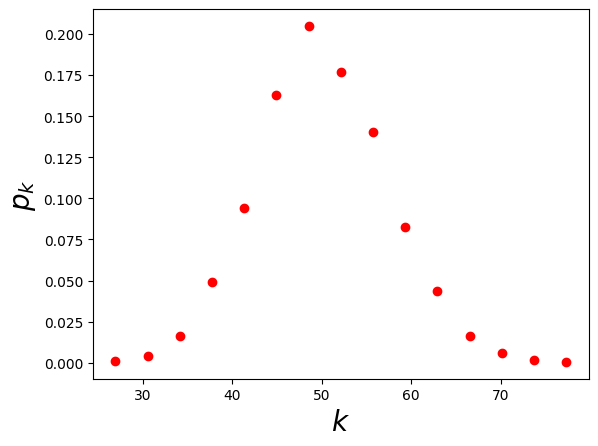

In [4]:
plt.plot(x0/samples, y0/samples, 'ro')
plt.xlabel("$k$", fontsize=20)
plt.ylabel("$p_k$", fontsize=20)

### ER随机网络的平均距离

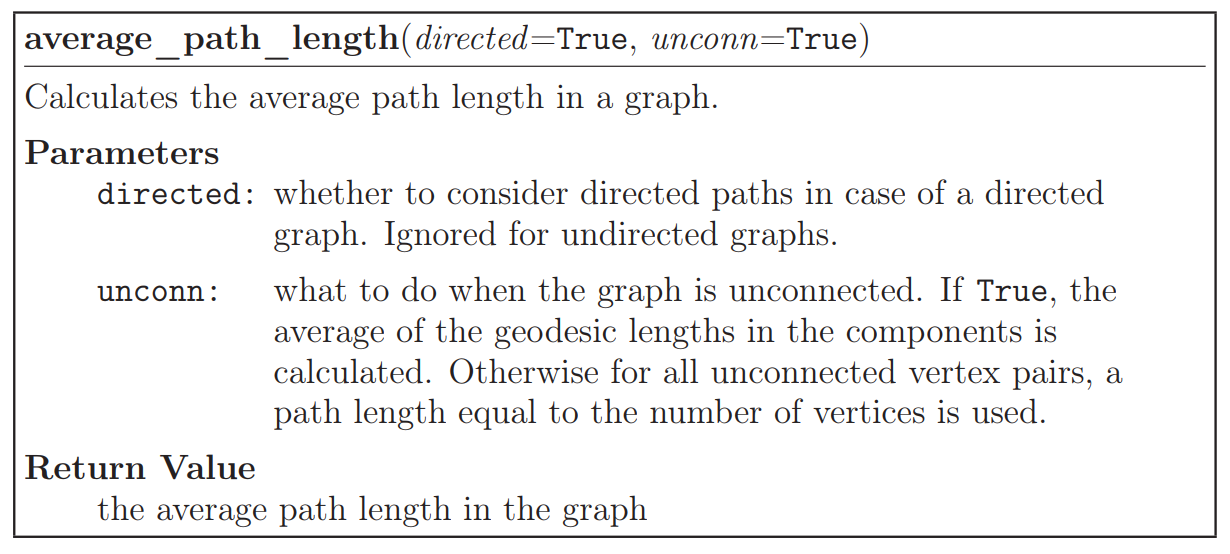

In [5]:
from IPython.display import Image
Image(filename = './attached files/average_path_length.png', width=600, height=400)

In [8]:
N, L = 5000, 25000
GNX = nx.gnm_random_graph(N, L)

# 确保生成的网络是连通的
while not nx.is_connected(GNX):
    GNX = nx.gnm_random_graph(N, L)

    
gig = ig.Graph.from_networkx(GNX)
    
# # 比较networkx和igraph的效率
t1 = time.perf_counter()
spl_nx = nx.average_shortest_path_length(GNX)
t2 = time.perf_counter()
print("networkx计算所需时间为：", t2-t1)

t3 = time.perf_counter()
spl_ig = gig.average_path_length()
t4 = time.perf_counter()
print("igraph计算所需时间为：", t4-t3)

networkx计算所需时间为： 34.065713399999936
igraph计算所需时间为： 1.3101162000000386


In [9]:
N = [100,200,300,500,700,1000,2000,5000]
samples = 10
avl = []  # 平均最短距离
avc = []  # 平均局部集聚系数
t_avl = []  # 平均距离的理论近似值
t_avc = []  # 平均局部集聚系数的理论近似值

for i, n in enumerate(N):
    s1 = 0
    s2 = 0
    s3 = 0
    s4 = 0
    for i in range(samples):
        g = ig.Graph.Erdos_Renyi(n=n, m=5*n)
        avk = sum(g.degree())/n
        s1 += g.average_path_length()
        s2 += np.log(n) / np.log(avk)
        s3 += g.transitivity_avglocal_undirected(mode='zero')
        s4 += avk / n
            
    avl.append(s1/samples)
    t_avl.append((s2/samples))
    avc.append(s3/samples)
    t_avc.append(s4/samples)

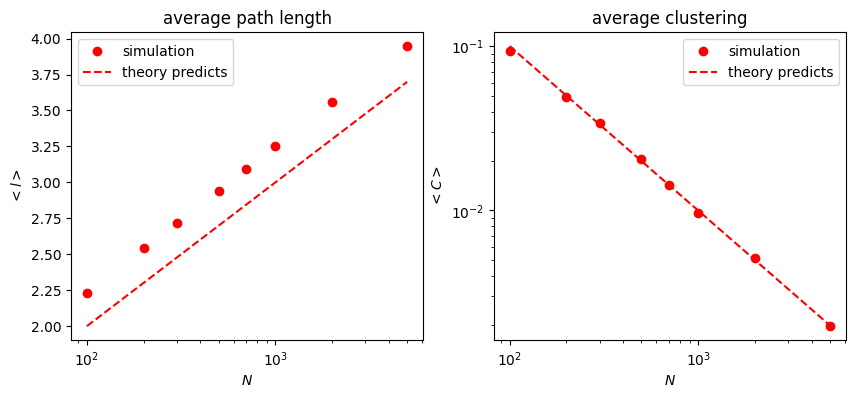

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(N, avl, 'ro', label='simulation')
axs[0].plot(N, t_avl, 'r--', label='theory predicts')
axs[0].set_title("average path length")
axs[0].legend(loc=0)
axs[0].set_xlabel("$N$")
axs[0].set_ylabel("$<l>$")
axs[0].set_xscale("log")


axs[1].plot(N, avc, 'ro', label='simulation')
axs[1].plot(N, t_avc, 'r--', label='theory predicts')
axs[1].set_title("average clustering")
axs[1].legend(loc=0)
axs[1].set_xlabel("$N$")
axs[1].set_ylabel("$<C>$")
axs[1].set_xscale("log")
axs[1].set_yscale("log")

In [14]:
# 判断网络的连通性：Graph.is_connected()
g = ig.Graph.Erdos_Renyi(n=1000, m=1000)
g.is_connected()

False

In [15]:
# 对于不连通网络，当unconn设定为True时，返回的是各个连通子图平均距离的平均值
g.average_path_length(unconn=True)

8.921728443802015

In [17]:
components = g.components(mode='strong')
# 获得最大连通子图
LCC = g.induced_subgraph(components[0])
LCC.is_connected()

True

In [18]:
LCC.average_path_length()

8.923111951800477

### WS小世界网络的平均距离

In [19]:
# 当作课后作业